In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
import scipy.signal as signal
from scipy import sparse
from scipy.sparse.linalg import spsolve

/home/apk/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
#import glob
#print glob.glob('/home/apk/id6Day2-20190503T211715Z-001/id6Day2/*.hdf5')

In [4]:
arr=list(os.listdir('/home/apk/id6Day7-20190503T212715Z-001/id6Day7'))
arr.sort()
print arr[len(arr)-14:]

['a2018.10.24_10.58.25.hdf5', 'aa2018.10.24_12.17.07.hdf5', 'b2018.10.24_11.01.08.hdf5', 'bb2018.10.24_12.19.25.hdf5', 'c2018.10.24_11.01.51.hdf5', 'cc2018.10.24_12.20.02.hdf5', 'd2018.10.24_11.03.05.hdf5', 'dd2018.10.24_12.21.21.hdf5', 'e2018.10.24_11.03.39.hdf5', 'ee2018.10.24_12.22.02.hdf5', 'f2018.10.24_11.06.02.hdf5', 'ff2018.10.24_12.24.26.hdf5', 'g2018.10.24_11.06.26.hdf5', 'gg2018.10.24_12.25.10.hdf5']


In [5]:
arr1=(list(os.listdir('/home/apk/id6Day1-20190503T170539Z-001/id6Day1')))
arr2=(list(os.listdir('/home/apk/id6Day2-20190503T211715Z-001/id6Day2')))
arr7=(list(os.listdir('/home/apk/id6Day7-20190503T212715Z-001/id6Day7')))
arr30=(list(os.listdir('/home/apk/id6Day30-20190503T212316Z-001/id6Day30')))
arr90=(list(os.listdir('/home/apk/id6Day90-20190503T213214Z-001/id6Day90')))
arr1.sort()
arr2.sort()
arr7.sort()
arr30.sort()
arr90.sort()
efile=[]
efile.append(arr1[len(arr1)-14:])
efile.append(arr2[len(arr2)-14:])
efile.append(arr7[len(arr7)-14:])
efile.append(arr30[len(arr30)-14:])
efile.append(arr90[len(arr90)-14:])
print efile[0][1]

aa2018.10.06_12.57.24.hdf5


In [6]:
def CAR(samples):
    s=[]
    for i in range(0, len(samples)):
        s.append((sum(samples))/64.0)
    
    sample=samples-s
    return sample, s

In [7]:
def elliptic_bandpass(order, rp, rs, lowcut, highcut):
    fs=256
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.ellip(order, rp, rs, [low, high], btype='bandpass', analog=False, output='ba')
    return b, a

In [8]:
def baseline_als(y, lam, p, niter=10):
    L = len(y)
    D = sparse.diags([1,-2,1],[0,-1,-2], shape=(L,L-2))
    #D = sparse.csc_matrix(np.diff(np.eye(L), 2))
    w = np.ones(L)
    for i in range(niter):
        W = sparse.spdiags(w, 0, L, L)
        Z = W + lam * D.dot(D.transpose())
        z = spsolve(Z, w*y)
        w = p * (y > z) + (1-p) * (y < z)
    return z

In [9]:
spr_channels1=[0,2,7,9,11,13,15,62,25,27,29,31,33,63,43,45,47,49,51,57,59]
spr_channels=[57]
spr_channel_names=['fp1','fp2','f7','f3','fz','f4','f8','A1','T3','C3','Cz','C4','T4','A2','T5','P3','Pz','P4','T6'
                  ,'O1','O2']

In [10]:
def power(x):
    x=1.0*(x)
    return sum(x**2)/len(x)

In [11]:
path="id6Day90-20190503T213214Z-001"
plt.rcParams["figure.figsize"] = [25,16]

1
0
[6.888249351917789, 21.84750864940139, 17.324579732781736, 4.590211825487186, 2.1427449345692553]
1
0
[8.417453684853589, 29.185163467192112, 20.303646107145394, 4.50574307601117, 1.497815506900684]
1
0
[7.283426569693029, 16.443743194813035, 17.952667498614776, 4.006598357775188, 1.8131360202477642]
1
0
[3.770371799140681, 13.208658829796452, 15.13916257838379, 4.449154657061037, 2.575994691346166]
1
0
[56.825983819984316, 67.33211096200384, 42.52450637109321, 20.50091361134724, 61345.76536330816]
1
0
[41.431212692105454, 53.995633535976985, 33.475774339863825, 16.535293507706047, 78825.47774439523]
1
0
[4.722726105383767, 22.32950491180455, 42.147999540402296, 8.78001326455981, 6.107374741642516]
1
0
[4.909238775750839, 23.945468230496207, 42.614110590967435, 8.390590894839825, 5.567953785304573]
1
0
[5.394174208408056, 7.723323553948607, 28.762285266921566, 7.723684070048314, 5.134246299078973]
1
0
[1.973493864487858, 11.019961987355984, 33.02838379389987, 7.637874116689894, 5.1

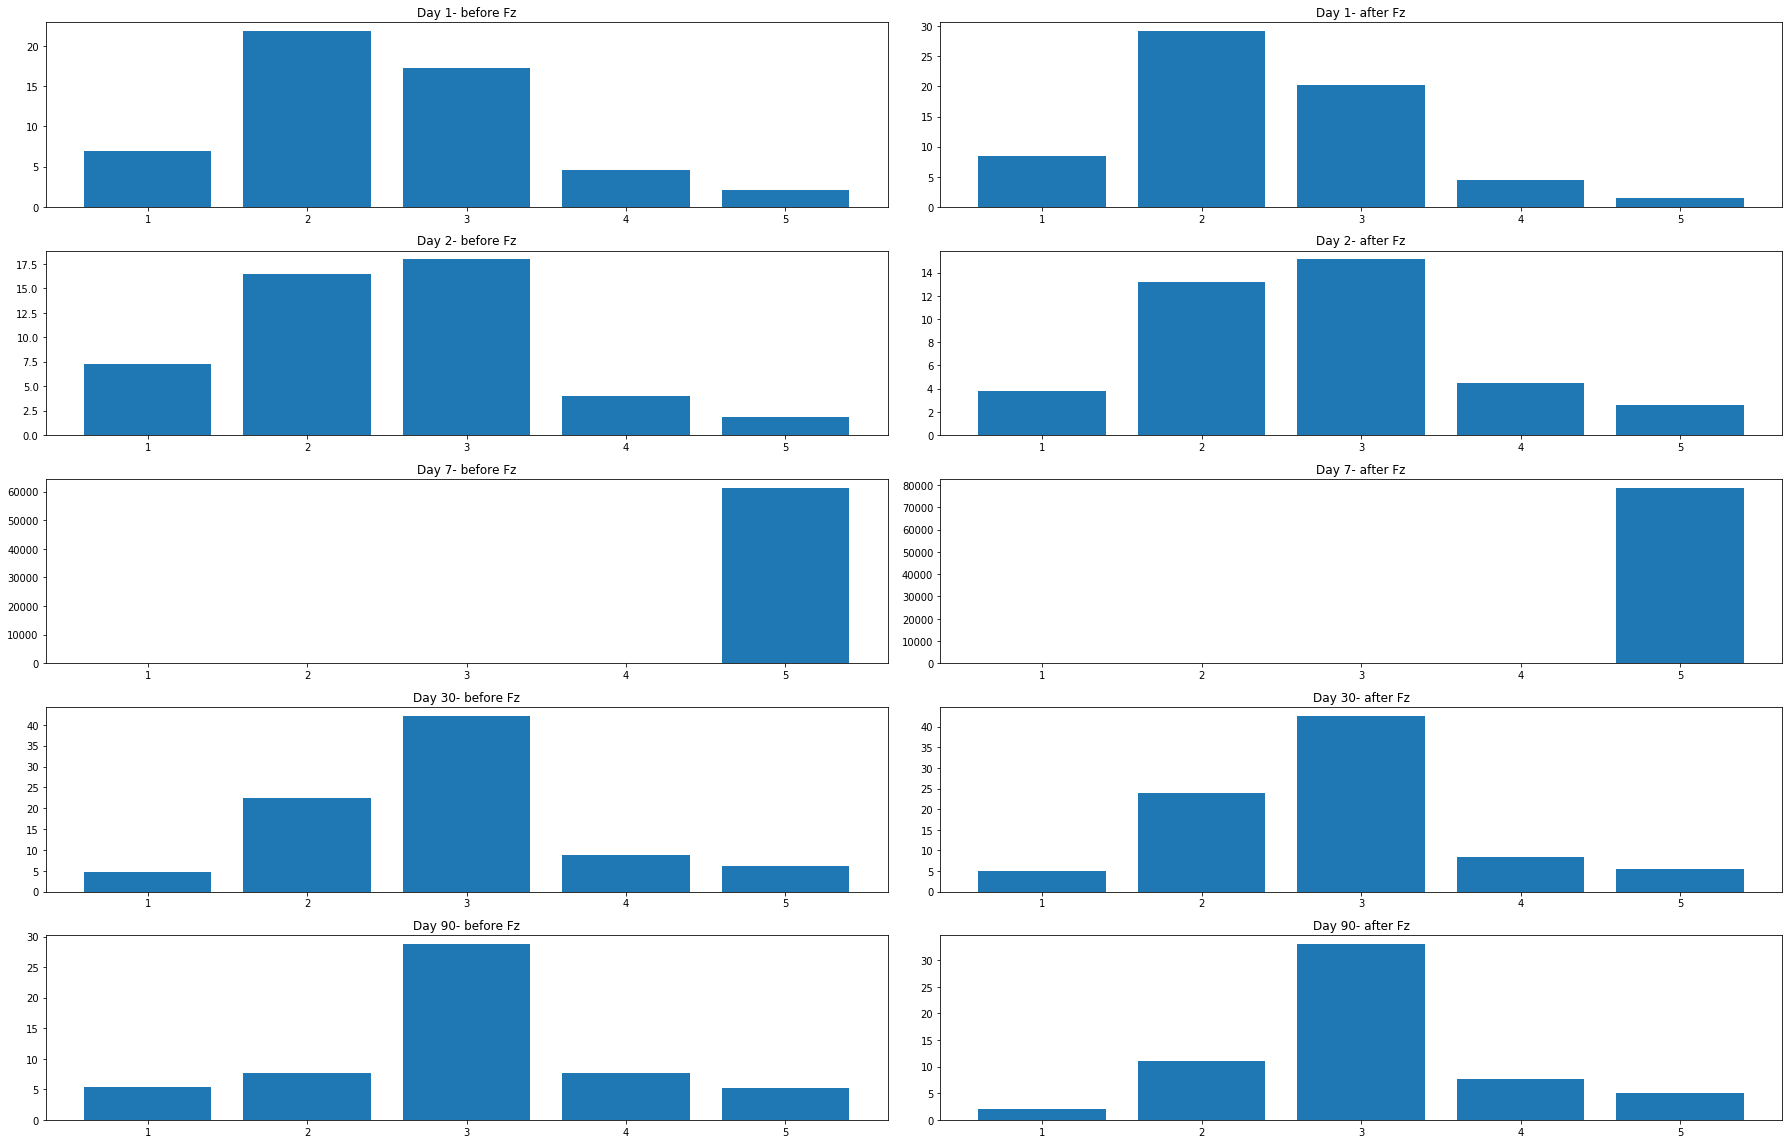

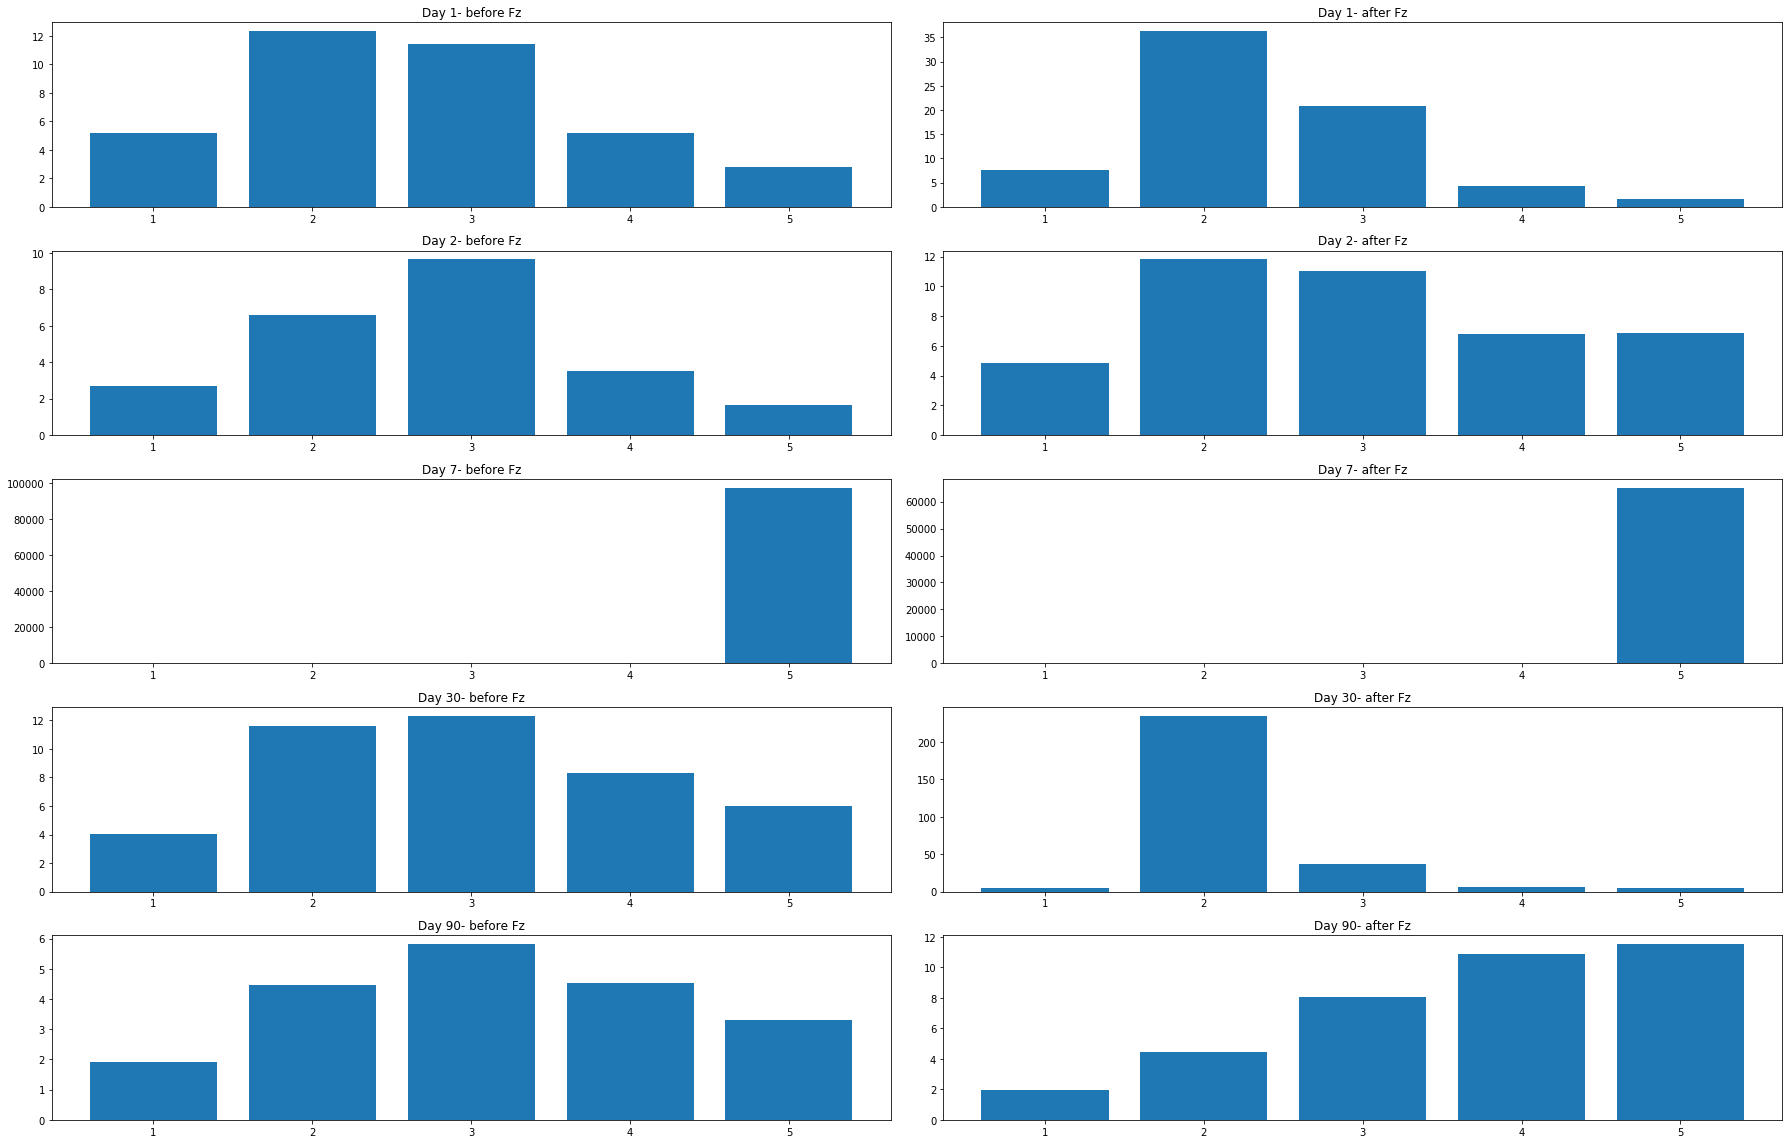

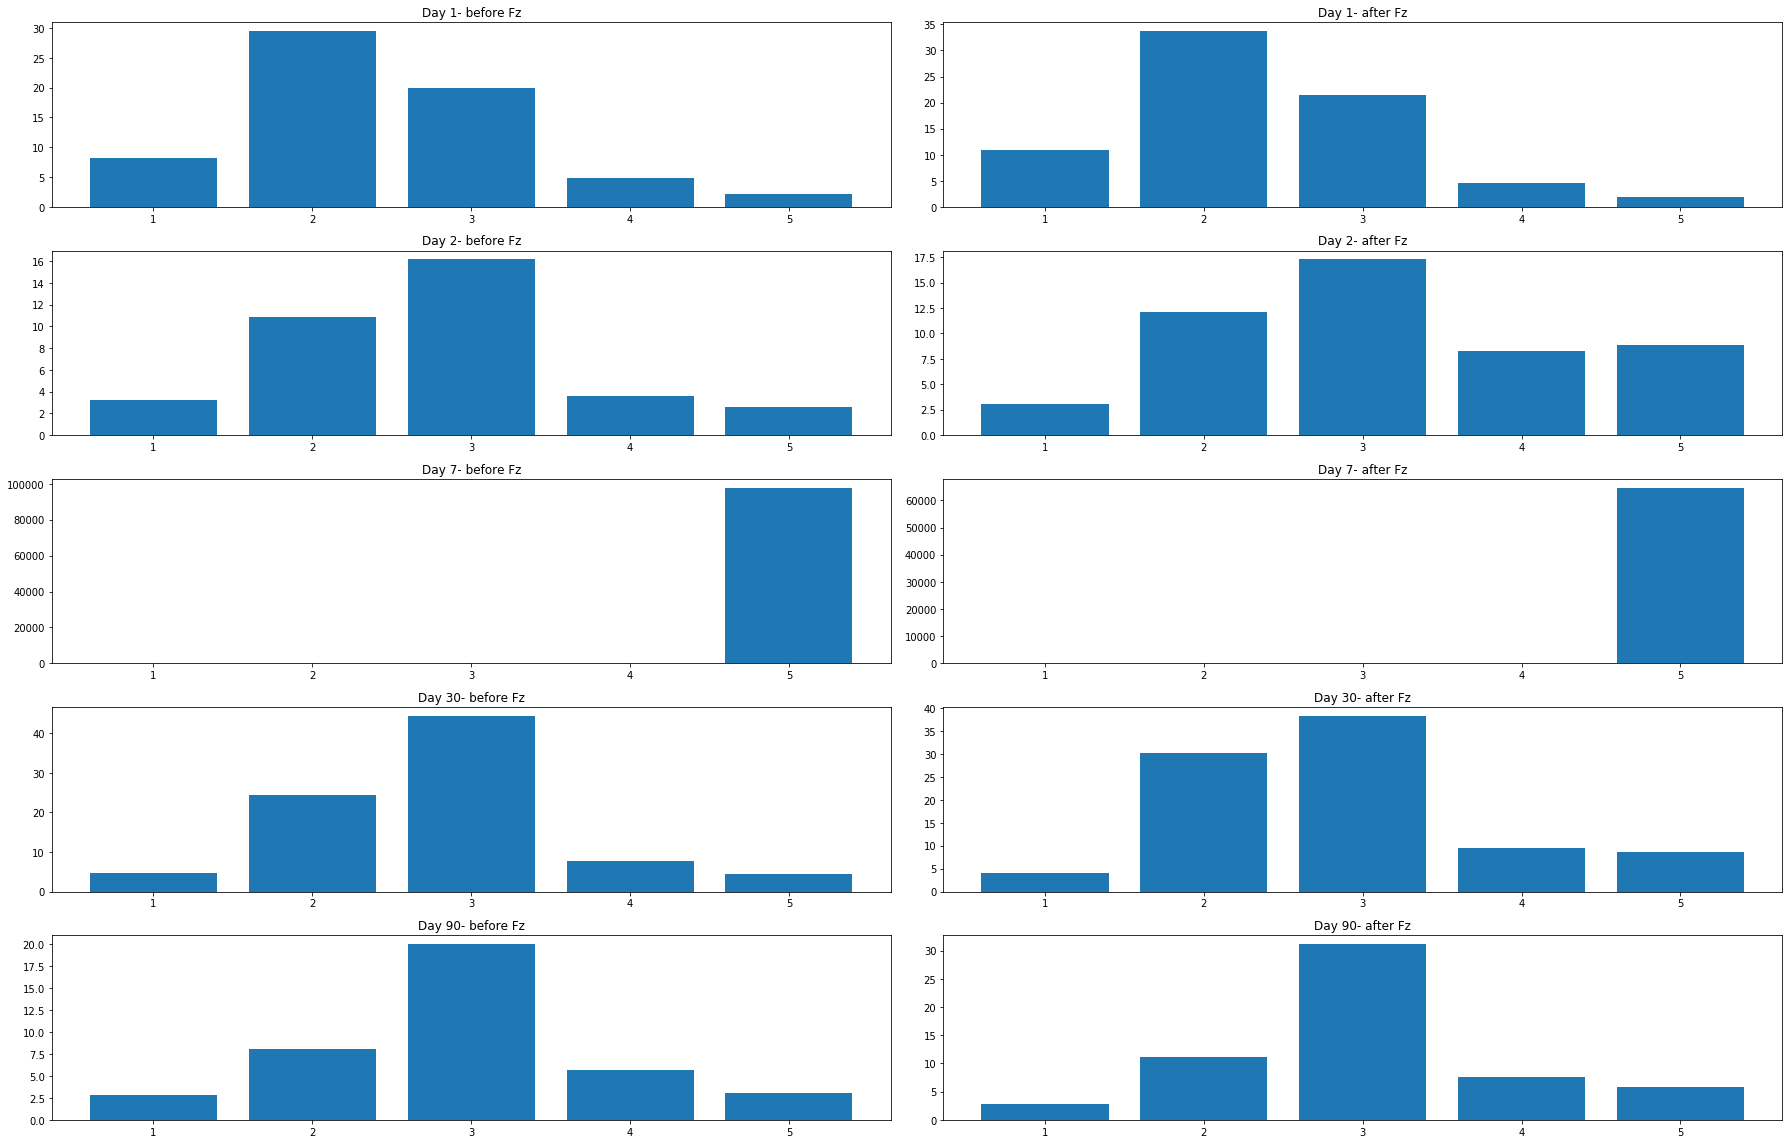

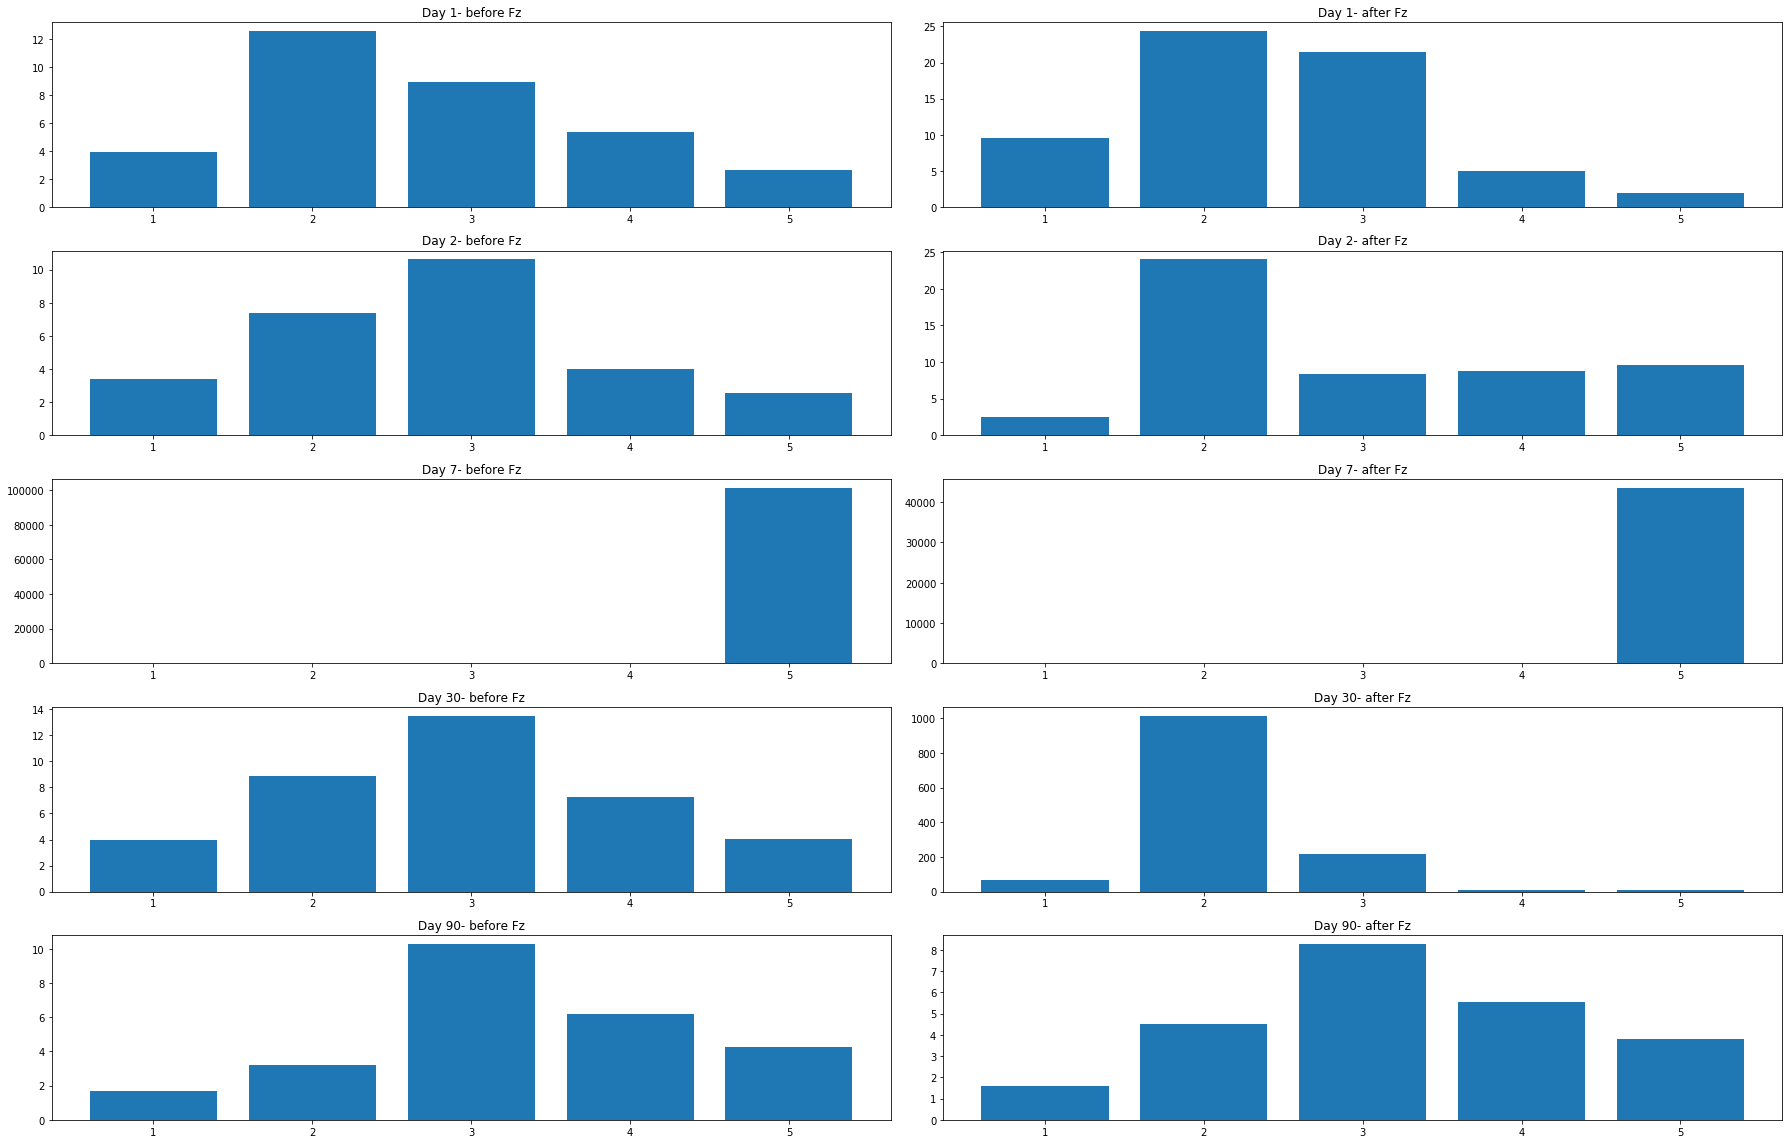

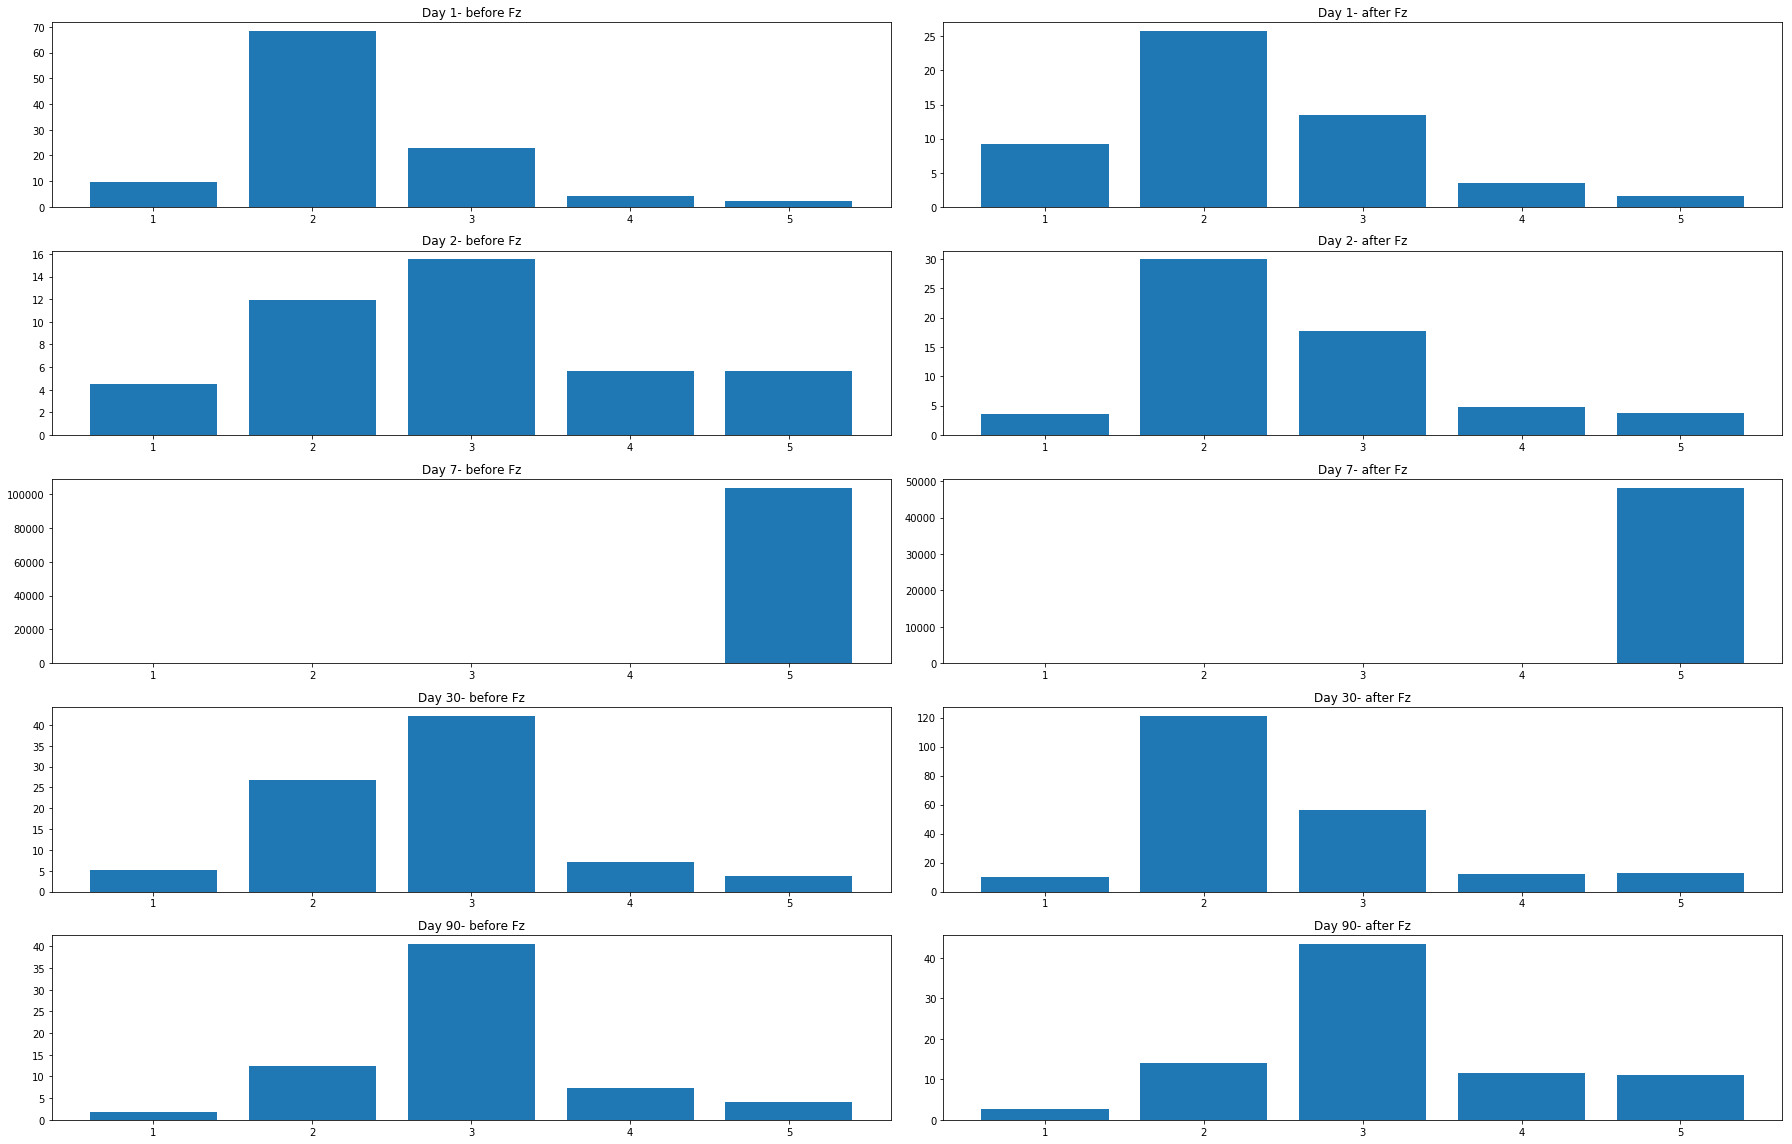

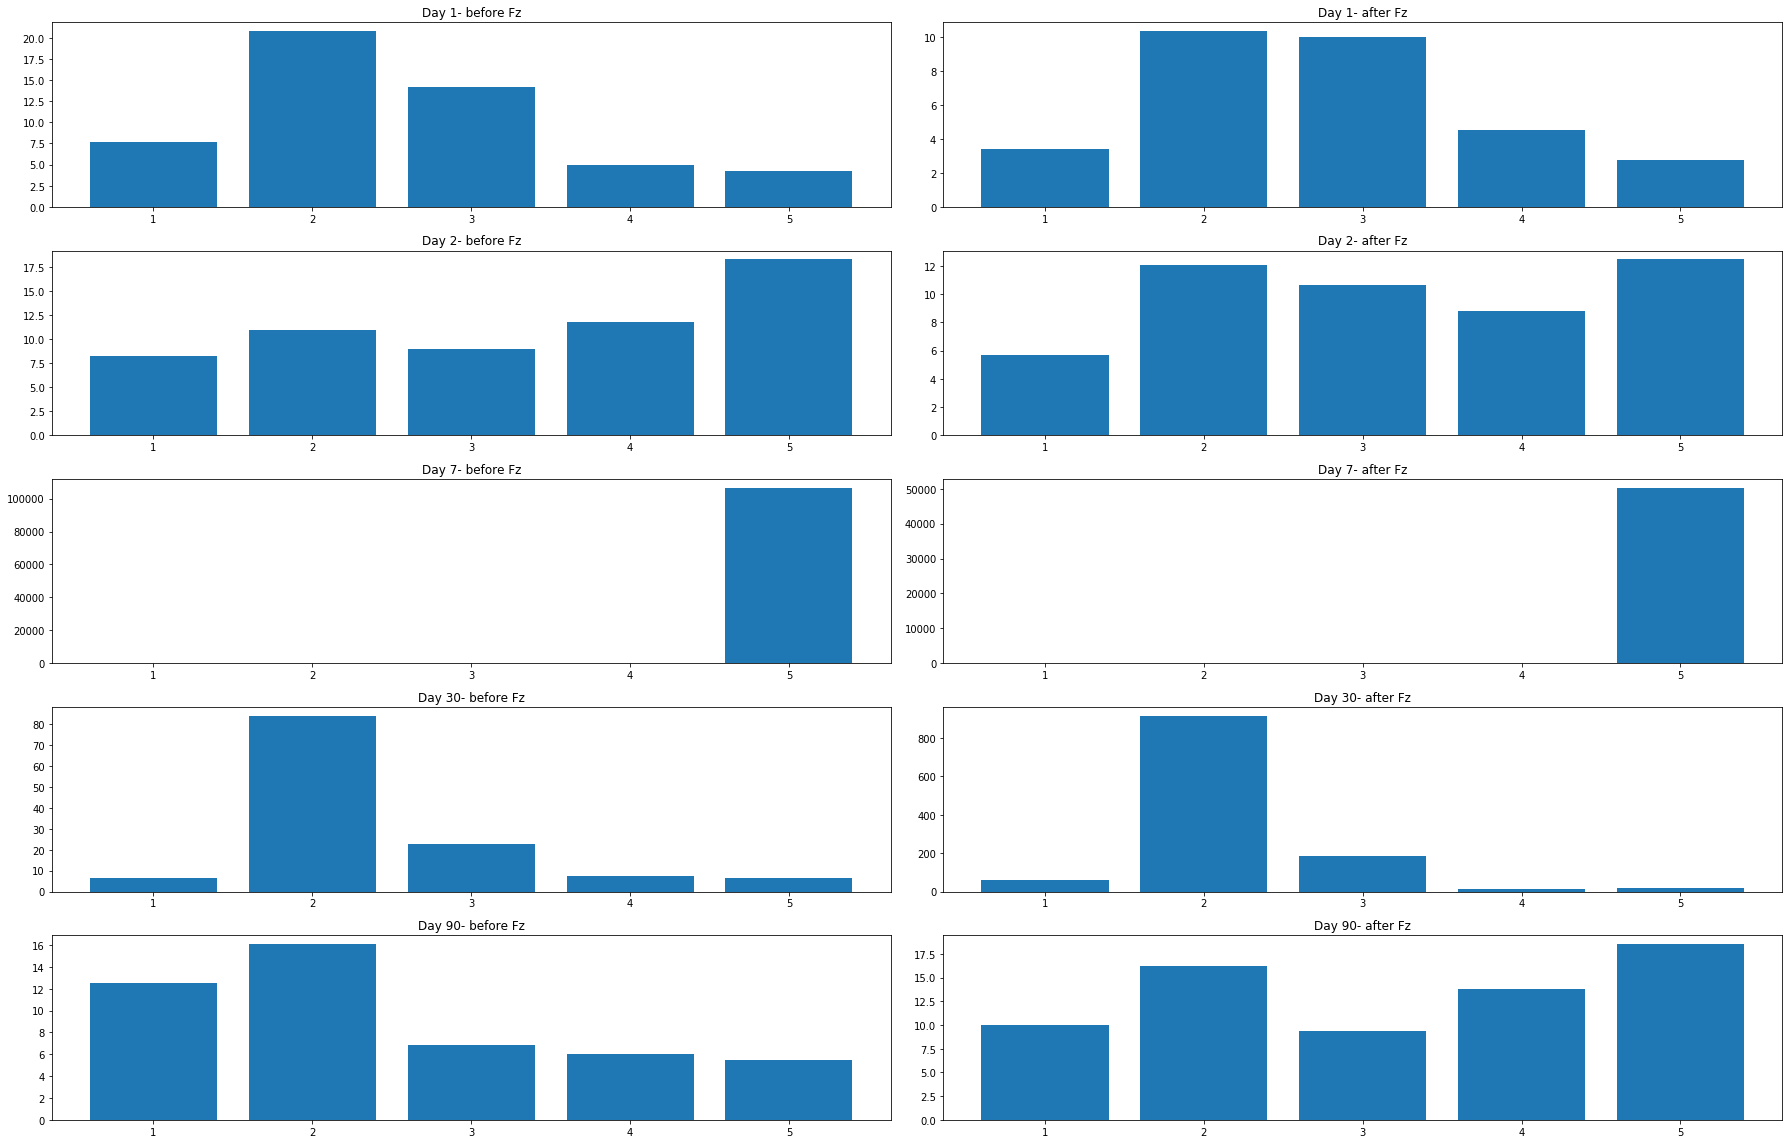

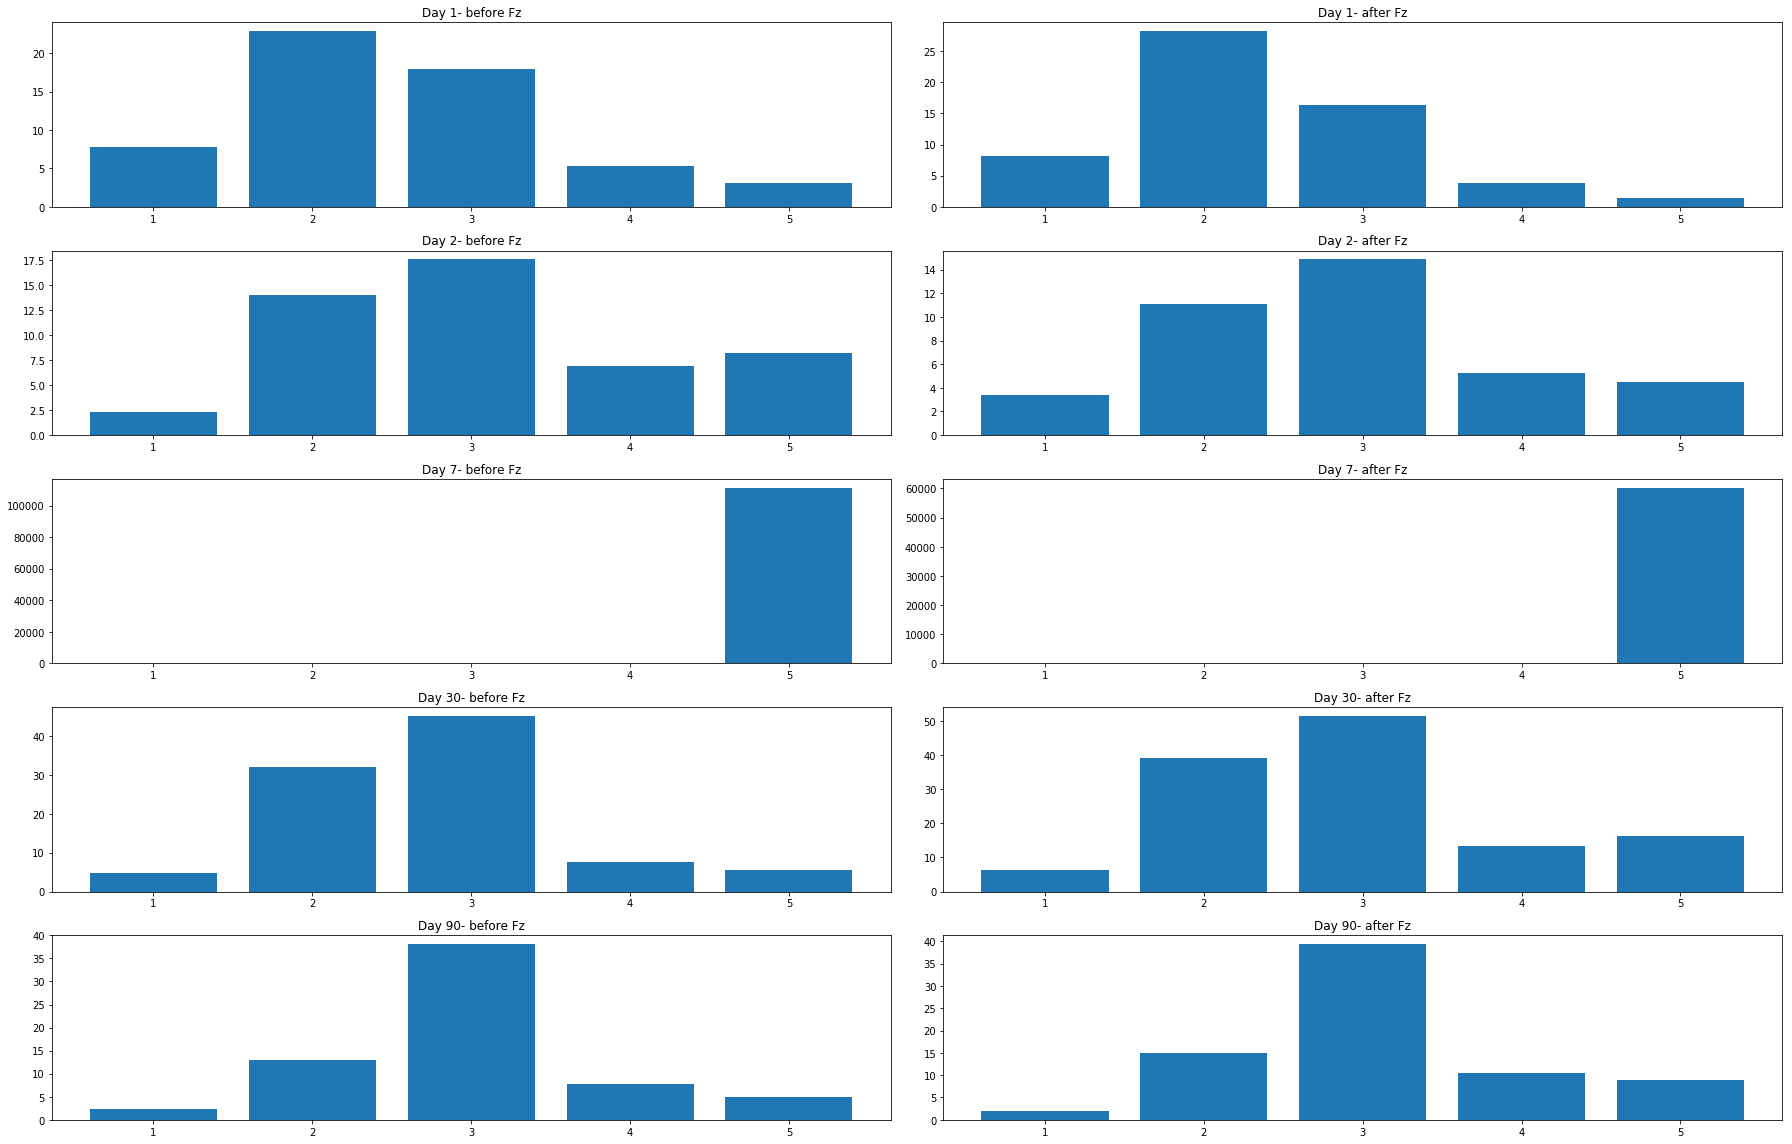

In [12]:
for i in range (0, len(efile[0]), 2):
    activity=str(efile[0][i][0:4])
    eeg=[]
    for j in range(0, len(efile)):
        eeg.append(h5py.File(efile[j][i],mode='r'))
        eeg.append(h5py.File(efile[j][i+1],mode='r'))
    samples=[]
    sampletime1=[]
    for j in range(0, len(eeg)):
        sam=[]
        sa=np.array(eeg[j]["RawData"]['Samples'])
        sa=sa.T
        sa,_=CAR(sa)
        samples.append(sa)
        sampletime = np.array(eeg[j]['AsynchronData']["Time"])
        sam.append(int(sampletime[0]))
        sam.append(int(sampletime[1]))
        sampletime1.append(sam)
    
    freq=[[0.5, 4], [4, 8], [8, 13], [13, 30], [30, 100]]
    fs=256
    order=4
    rp=0.5
    rs=30
    powe=[]
    for j in range(0, len(samples)):
        print 1
        alpha=[]
        beta=[]
        gamma=[]
        delta=[]
        theta=[]
        p=[]
        for k in spr_channels:
            b, a = elliptic_bandpass(order, rp, rs, freq[0][0], freq[0][1])
            delta.append(signal.filtfilt(b, a, samples[j][k], padlen=0))
            b, a = elliptic_bandpass(order, rp, rs, freq[1][0], freq[1][1])
            theta.append(signal.filtfilt(b, a, samples[j][k], padlen=0))
            b, a = elliptic_bandpass(order, rp, rs, freq[2][0], freq[2][1])
            alpha.append(signal.filtfilt(b, a, samples[j][k], padlen=0))
            b, a = elliptic_bandpass(order, rp, rs, freq[3][0], freq[3][1])
            beta.append(signal.filtfilt(b, a, samples[j][k], padlen=0))
            b, a = elliptic_bandpass(order, rp, rs, freq[4][0], freq[4][1])
            gamma.append(signal.filtfilt(b, a, samples[j][k], padlen=0))
            
        for k in range(0, len(spr_channels)):
            print k
            alpha[k]=alpha[k][sampletime1[j][0]:sampletime1[j][1]]
            beta[k]=beta[k][sampletime1[j][0]:sampletime1[j][1]]
            gamma[k]=gamma[k][sampletime1[j][0]:sampletime1[j][1]]
            delta[k]=delta[k][sampletime1[j][0]:sampletime1[j][1]]
            theta[k]=theta[k][sampletime1[j][0]:sampletime1[j][1]]
            za=baseline_als(alpha[k], 10**4, 0.1, 10)
            alpha[k]=alpha[k]-za
            za=baseline_als(beta[k],10**4, 0.1, 10)
            beta[k]=beta[k]-za
            za=baseline_als(gamma[k], 10**4, 0.1, 10)
            gamma[k]=gamma[k]-za
            za=baseline_als(theta[k], 10**4, 0.1, 10)
            theta[k]=theta[k]-za
            za=baseline_als(delta[k], 10**4, 0.1, 10)
            delta[k]=delta[k]-za
        
        for k in range(0,len(spr_channels)):
            p.append(power(delta[k]))
            p.append(power(theta[k]))
            p.append(power(alpha[k]))
            p.append(power(beta[k]))
            p.append(power(gamma[k]))
            #p=p/max(p)
            print p
        powe.append(p)
        
    
    fig=plt.figure()
    plot=fig.add_subplot(5,2,1)
    plt.bar([1,2,3,4,5], powe[0])
    plt.title("Day 1- before Fz")
    
    plot=fig.add_subplot(5,2,2)
    plt.bar([1,2,3,4,5], powe[1])
    plt.title("Day 1- after Fz")
    
    plot=fig.add_subplot(5,2,3)
    plt.bar([1,2,3,4,5], powe[2])
    plt.title("Day 2- before Fz")
    
    plot=fig.add_subplot(5,2,4)
    plt.bar([1,2,3,4,5], powe[3])
    plt.title("Day 2- after Fz")
    
    plot=fig.add_subplot(5,2,5)
    plt.bar([1,2,3,4,5], powe[4])
    plt.title("Day 7- before Fz")
    
    plot=fig.add_subplot(5,2,6)
    plt.bar([1,2,3,4,5], powe[5])
    plt.title("Day 7- after Fz")
    
    plot=fig.add_subplot(5,2,7)
    plt.bar([1,2,3,4,5], powe[6])
    plt.title("Day 30- before Fz")
    
    plot=fig.add_subplot(5,2,8)
    plt.bar([1,2,3,4,5], powe[7])
    plt.title("Day 30- after Fz")
    
    plot=fig.add_subplot(5,2,9)
    plt.bar([1,2,3,4,5], powe[8])
    plt.title("Day 90- before Fz")
    
    plot=fig.add_subplot(5,2,10)
    plt.bar([1,2,3,4,5], powe[9])
    plt.title("Day 90- after Fz")
    
    plt.tight_layout()
    plt.savefig(path+'/'+activity+'.png')